Epoch 1/40
56/56 [==============================] - 1s 13ms/step - loss: 0.0156
Epoch 2/40
56/56 [==============================] - 1s 12ms/step - loss: 0.0037
Epoch 3/40
56/56 [==============================] - 1s 11ms/step - loss: 0.0033
Epoch 4/40
56/56 [==============================] - 1s 10ms/step - loss: 0.0035
Epoch 5/40
56/56 [==============================] - 1s 11ms/step - loss: 0.0032
Epoch 6/40
56/56 [==============================] - 1s 10ms/step - loss: 0.0027
Epoch 7/40
56/56 [==============================] - 1s 11ms/step - loss: 0.0025
Epoch 8/40
56/56 [==============================] - 1s 11ms/step - loss: 0.0025
Epoch 9/40
56/56 [==============================] - 1s 11ms/step - loss: 0.0025
Epoch 10/40
56/56 [==============================] - 1s 11ms/step - loss: 0.0022
Epoch 11/40
56/56 [==============================] - 1s 11ms/step - loss: 0.0021
Epoch 12/40
56/56 [==============================] - 1s 12ms/step - loss: 0.0023
Epoch 13/40
56/56 [==================

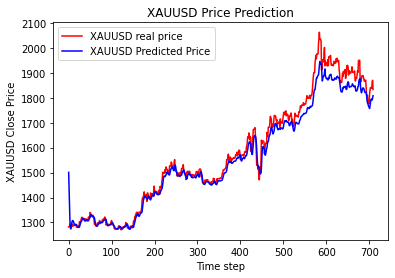

In [8]:
#Data Preprocessing
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#Importing the training set
dataset_train = pd.read_csv('/content/drive/MyDrive/XAUUSD_Candlestick_1_D_BID_01.01.2015-31.12.2019.csv')
training_set = dataset_train.iloc[:, 4:5].values

#Data Normalization
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = scaler.fit_transform(training_set)

#Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, len(dataset_train)):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

#Reshaping training set
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

#Building the RNN with LSTM layers
#Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

model = Sequential()
model.add(LSTM(units = 128, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units = 128, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 64))
model.add(Dropout(0.2))
model.add(Dense(units = 1))

model.compile(optimizer = 'adam', loss = 'mean_squared_error')

model.fit(X_train, y_train, epochs = 40, batch_size = 32)

#Making Predictions on the Test Set
#We start by importing the test set

dataset_test = pd.read_csv('/content/drive/MyDrive/XAUUSD_Candlestick_1_D_BID_01.01.2019-09.12.2020.csv')
test_set = dataset_test.iloc[:, 4:5].values

total = pd.concat((dataset_train['Close'], dataset_test['Close']), axis = 0)
inputs = total[len(total) - len(test_set) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = scaler.transform(inputs)
X_test = []
for i in range(60, inputs.shape[0]):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_price = model.predict(X_test)
predicted_price = scaler.inverse_transform(predicted_price)

# Visualising the results
plt.plot(test_set, color = 'red', label = 'XAUUSD real price')
plt.plot(predicted_price, color = 'blue', label = 'XAUUSD Predicted Price')
plt.title('XAUUSD Price Prediction')
plt.xlabel('Time step')
plt.ylabel('XAUUSD Close Price')
plt.legend()
plt.show()
